Like `emf.fields`, the `emf.subcalc` package was originally intended to streamline the use of an external modeling program. Initially, `emf.subcalc` only contained functions to handle the output files of the external program, which is called SUBCALC. This notebook demonstrates how `emf.subcalc` can be used as an extension of SUBCALC.

In [1]:
from emf import subcalc as sc
#commands to make plots appear inside this notebook
sc.ion()
%matplotlib inline
#the "pretty printing" module is used to print variables more readably
from pprint import pprint

**Working with SUBCALC output files**

The SUBCALC program calculates magnetic fields over a fixed-height grid of uniformly spaced points. The grid of results can be exported to a text file by going to "Output > Ascii > Reference Grid (Formatted)" in the toolbar at the top of the SUBCALC window. The text file will have a ".REF" extension, which is short for "Reference Grid." Unfortunately, the formatting of the REF file makes it hard to work with. So, to extract the grid of results, `emf.subcalc` provides the `read_REF` function. This function will parse the REF file and return two variables.
1. The first return variable is a dictionary of `numpy` vectors, with arrays for the `x` and `y` coordinates of each sample and arrays for magnetic field components (`Bmax`, `Bres`, `Bx`, `By`, `Bz`) of those samples. These arrays are one dimensional, but can easily converted to 2D grids, which will be demonstrated further down.
2. The second return variable is a dictionary of model metadata. It includes information like the date and time that the REF file was created, the number of sample points, etc.

In [2]:
data, info = sc.read_REF('TEST.REF')
pprint(data)

{'Bmax': array([[ 0.26,  0.26,  0.26, ...,  0.09,  0.09,  0.09],
       [ 0.26,  0.26,  0.26, ...,  0.09,  0.09,  0.09],
       [ 0.26,  0.26,  0.27, ...,  0.09,  0.09,  0.09],
       ..., 
       [ 0.22,  0.22,  0.22, ...,  0.07,  0.07,  0.07],
       [ 0.21,  0.22,  0.22, ...,  0.07,  0.07,  0.07],
       [ 0.21,  0.21,  0.22, ...,  0.07,  0.07,  0.07]]),
 'Bres': array([[ 0.26,  0.26,  0.26, ...,  0.09,  0.09,  0.09],
       [ 0.26,  0.26,  0.26, ...,  0.09,  0.09,  0.09],
       [ 0.26,  0.26,  0.27, ...,  0.09,  0.09,  0.09],
       ..., 
       [ 0.22,  0.22,  0.22, ...,  0.07,  0.07,  0.07],
       [ 0.21,  0.22,  0.22, ...,  0.07,  0.07,  0.07],
       [ 0.21,  0.21,  0.22, ...,  0.07,  0.07,  0.07]]),
 'Bx': array([[ 0.13,  0.13,  0.13, ...,  0.05,  0.05,  0.05],
       [ 0.13,  0.13,  0.14, ...,  0.05,  0.05,  0.05],
       [ 0.14,  0.14,  0.14, ...,  0.05,  0.05,  0.05],
       ..., 
       [ 0.06,  0.06,  0.06, ...,  0.02,  0.02,  0.02],
       [ 0.06,  0.06,  0.06, ...,  0

In [3]:
pprint(info)

{'B-Field Units ': 'mG',
 'Created on': 'Mon Jan 23 09:38:00 2017',
 'Distance Units': 'feet',
 'File': 'P:\\MBAUM\\PROGRA~1\\PYTHON\\PYTHON~1\\EMF\\WORKIN~1\\SUBCALC\\TEST1.REF',
 'Maximum X Coordinate': 500,
 'Maximum Y Coordinate': 500,
 'Minimum X Coordinate': 0,
 'Minimum Y Coordinate': 0,
 'Number X Grid Points': 501,
 'Number Y Grid Points': 501,
 'Program Name and Version': 'SUBCALC 2.0',
 'REF_path': 'TEST.REF',
 'Total Grid Points': 251001,
 'X Grid Increment': 1,
 'Y Grid Increment': 1,
 'Z Height': 3.28}


Now you could do anything you want with those variables, like writing the data to a flat file. However, the data are more useful as 2D arrays. `emf.subcalc` has a function called `mesh_dict_grids` that will convert the 1D arrays into 2D grids, but remember that `emf.subcalc` also has a `Results` class that is designed to work with the 2D grid data. Instead of using `mesh_dict_grids`, we might as well just load the REF file into a `Results` object. This is accomplished with the `load_results` function.

In [4]:
res = sc.load_results('TEST.REF')
print(res)

Results object
    name: 'TEST'
    components/Bkeys: 'Bmax', 'Bres', 'By', 'Bz', 'Bx'
    active component/Bkey: 'Bmax'
    Bmax range: 0.05 to 25.83 mG
    x limits: 0 to 500 ft
    y limits: 0 to 500 ft
    total samples: 251001
    sample spacing: 1 ft
    number of Footprints: 0
    Footprint groups: 


Now we can take advantage of all the `Results` object's capabilities, like interpolation, plotting, exporting, etc...

If, on the other hand, we simply want to convert the REF file to an excel file to make it more readable and to reduce the file size, `emf.subcalc` has a function for that. It's called `convert_REF`. It simply loads the REF file into a `Results` object then calls the object's `export` method.

In [5]:
sc.convert_REF('TEST.REF')

results saved to: TEST.xlsx


If you open the new file, TEST.xlsx, you'll see a tab for each component of the magnetic fields arranged as a grid, with the y coordinates along the rows and the x coordinates along the columns. You'll also see an "info" tab for the model metadata. You might *also* notice that the new excel file is about 12% the size of the original REF file.

If we want to, we can load the new excel file back into a `Results` object. The `load_results` function that we used on above on the REF file can also be used on the excel files created by exporting `Results` objects. So, if we wanted to, we could delete the REF file and use the excel version exclusively.

In [6]:
print(sc.load_results('TEST.xlsx'))

Results object
    name: 'TEST'
    components/Bkeys: 'Bres', 'Bmax', 'By', 'Bz', 'Bx'
    active component/Bkey: 'Bmax'
    Bmax range: 0.05 to 25.83 mG
    x limits: 0 to 500 ft
    y limits: 0 to 500 ft
    total samples: 251001
    sample spacing: 1 ft
    number of Footprints: 0
    Footprint groups: 


If we want to plot the results, we will likely want to include footprints in the plot. This can be done with an `emf.subcalc` footprint template (a new one can always be generated with the `drop_footprint_template` function). To associate footprints with the results in a REF file, the path to the footprint template can be passed as the second argument to `convert_REF` and `load_results`. 

In [7]:
res = sc.load_results('TEST.REF', 'TEST-footprints.csv')
print(res)

Results object
    name: 'TEST'
    components/Bkeys: 'Bmax', 'Bres', 'By', 'Bz', 'Bx'
    active component/Bkey: 'Bmax'
    Bmax range: 0.05 to 25.83 mG
    x limits: 0 to 500 ft
    y limits: 0 to 500 ft
    total samples: 251001
    sample spacing: 1 ft
    number of Footprints: 2
    Footprint groups: 'T-Line 2', 'T-Line 1'


Now when we print the `Results` object, it shows that `Footprint` objects have been associated with it from the "TEST-footprints.csv" file. The footprints will show up in plots.

(<matplotlib.figure.Figure at 0x88b1b50>,
 <matplotlib.contour.QuadContourSet at 0x14f74cf0>)

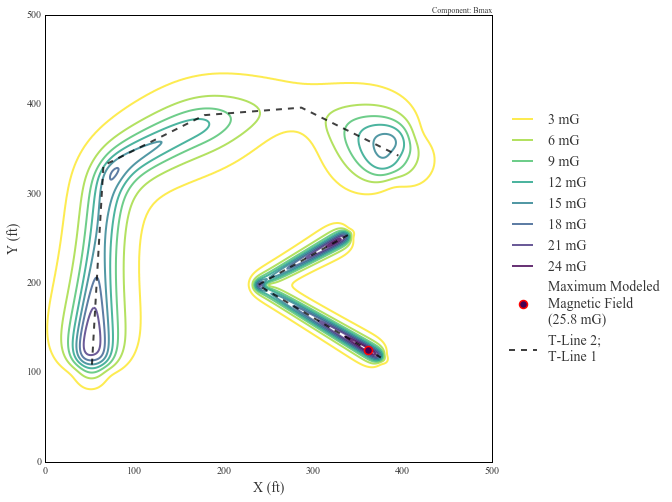

In [8]:
sc.plot_contour(res)

Those are the basics. Refer to the documentation for more info on `Results` objects and the functions that work with REF files.

**Working with SUBCALC input files**

The SUBCALC program is capable of generating formatted text files listing all of the parameters that go into the fields calculations. These files have ".INP" extensions, which is short for "input." These files can be generated by going to "Output > Ascii > Input Data" in the toolbar at the top of the SUBCALC window and they are a good way to keep track of the parameters used in a model. However, they cause errors when loaded back into SUBCALC. Only the binary ".SDW" files that SUBCALC creates can be loaded back in. So if you change a model and save the changes in your SDW file, you must remember to create a new INP file as well if you want to keep track of the input parameters. It's a hassle.

The solution is to store input parameters in an `emf.subcalc` tower template (which can be created with the `drop_tower_template` function).

However, if you need to bring the information saved to an INP file into `emf.subcalc`, you can use the `read_INP` function or the `load_towers` function. The `read_INP` function returns a list of `Tower` objects created from the INP file. The `load_towers` function can accept the path to an INP file or an `emf.subcalc` tower template file and automatically load the towers into a `Model` object. Generally, the `load_towers` function is the easier choice.

In [9]:
#Here we load the INP data into a list of Towers, which are then loaded into a
# Model object. The second argument indicates that the Tower objects should be
# put into a Model object instead of returned in a list.
mod = sc.load_towers('TEST.INP', True)
print(mod)

Model object
    name: 'TEST'
    x limits: 5.90505 to 440.297 ft
    y limits: 71.6831 to 426.71 ft
    sample height (z): 3.28 ft
    total samples: 100737
    sample spacing: 1.24186 ft
    number of Tower objects: 8
    number of Tower groups: 2
    tower group names: 'T-Line 2', 'T-Line 1'
    number of Condutor objects: 0
    total number of wire segments: 18


Now we can take advantage of the `Model` object's capabilities.

all calculations complete. total calculation time: 1.444 seconds.


(<matplotlib.figure.Figure at 0x17a9dfd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14f15910>)

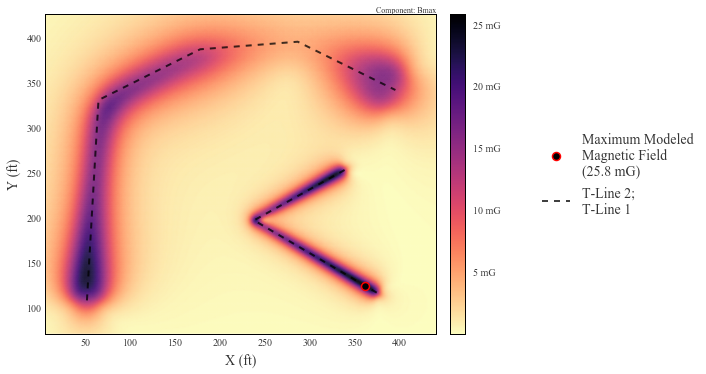

In [10]:
res = mod.calculate()
sc.plot_pcolormesh(res)

Those are the basics. Refer to the documentation for more info on `Model` and `Tower` objects and the functions that work with INP files.